In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm


fp = ff1.get_session(2023, 'Belgium', 'S')
#fp_laps = fp.load_laps(with_telemetry=True)
fp.load()

c:\Users\ricca\OneDrive\Desktop\F1dataAnalysis\env\Lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 0, 'Lap')

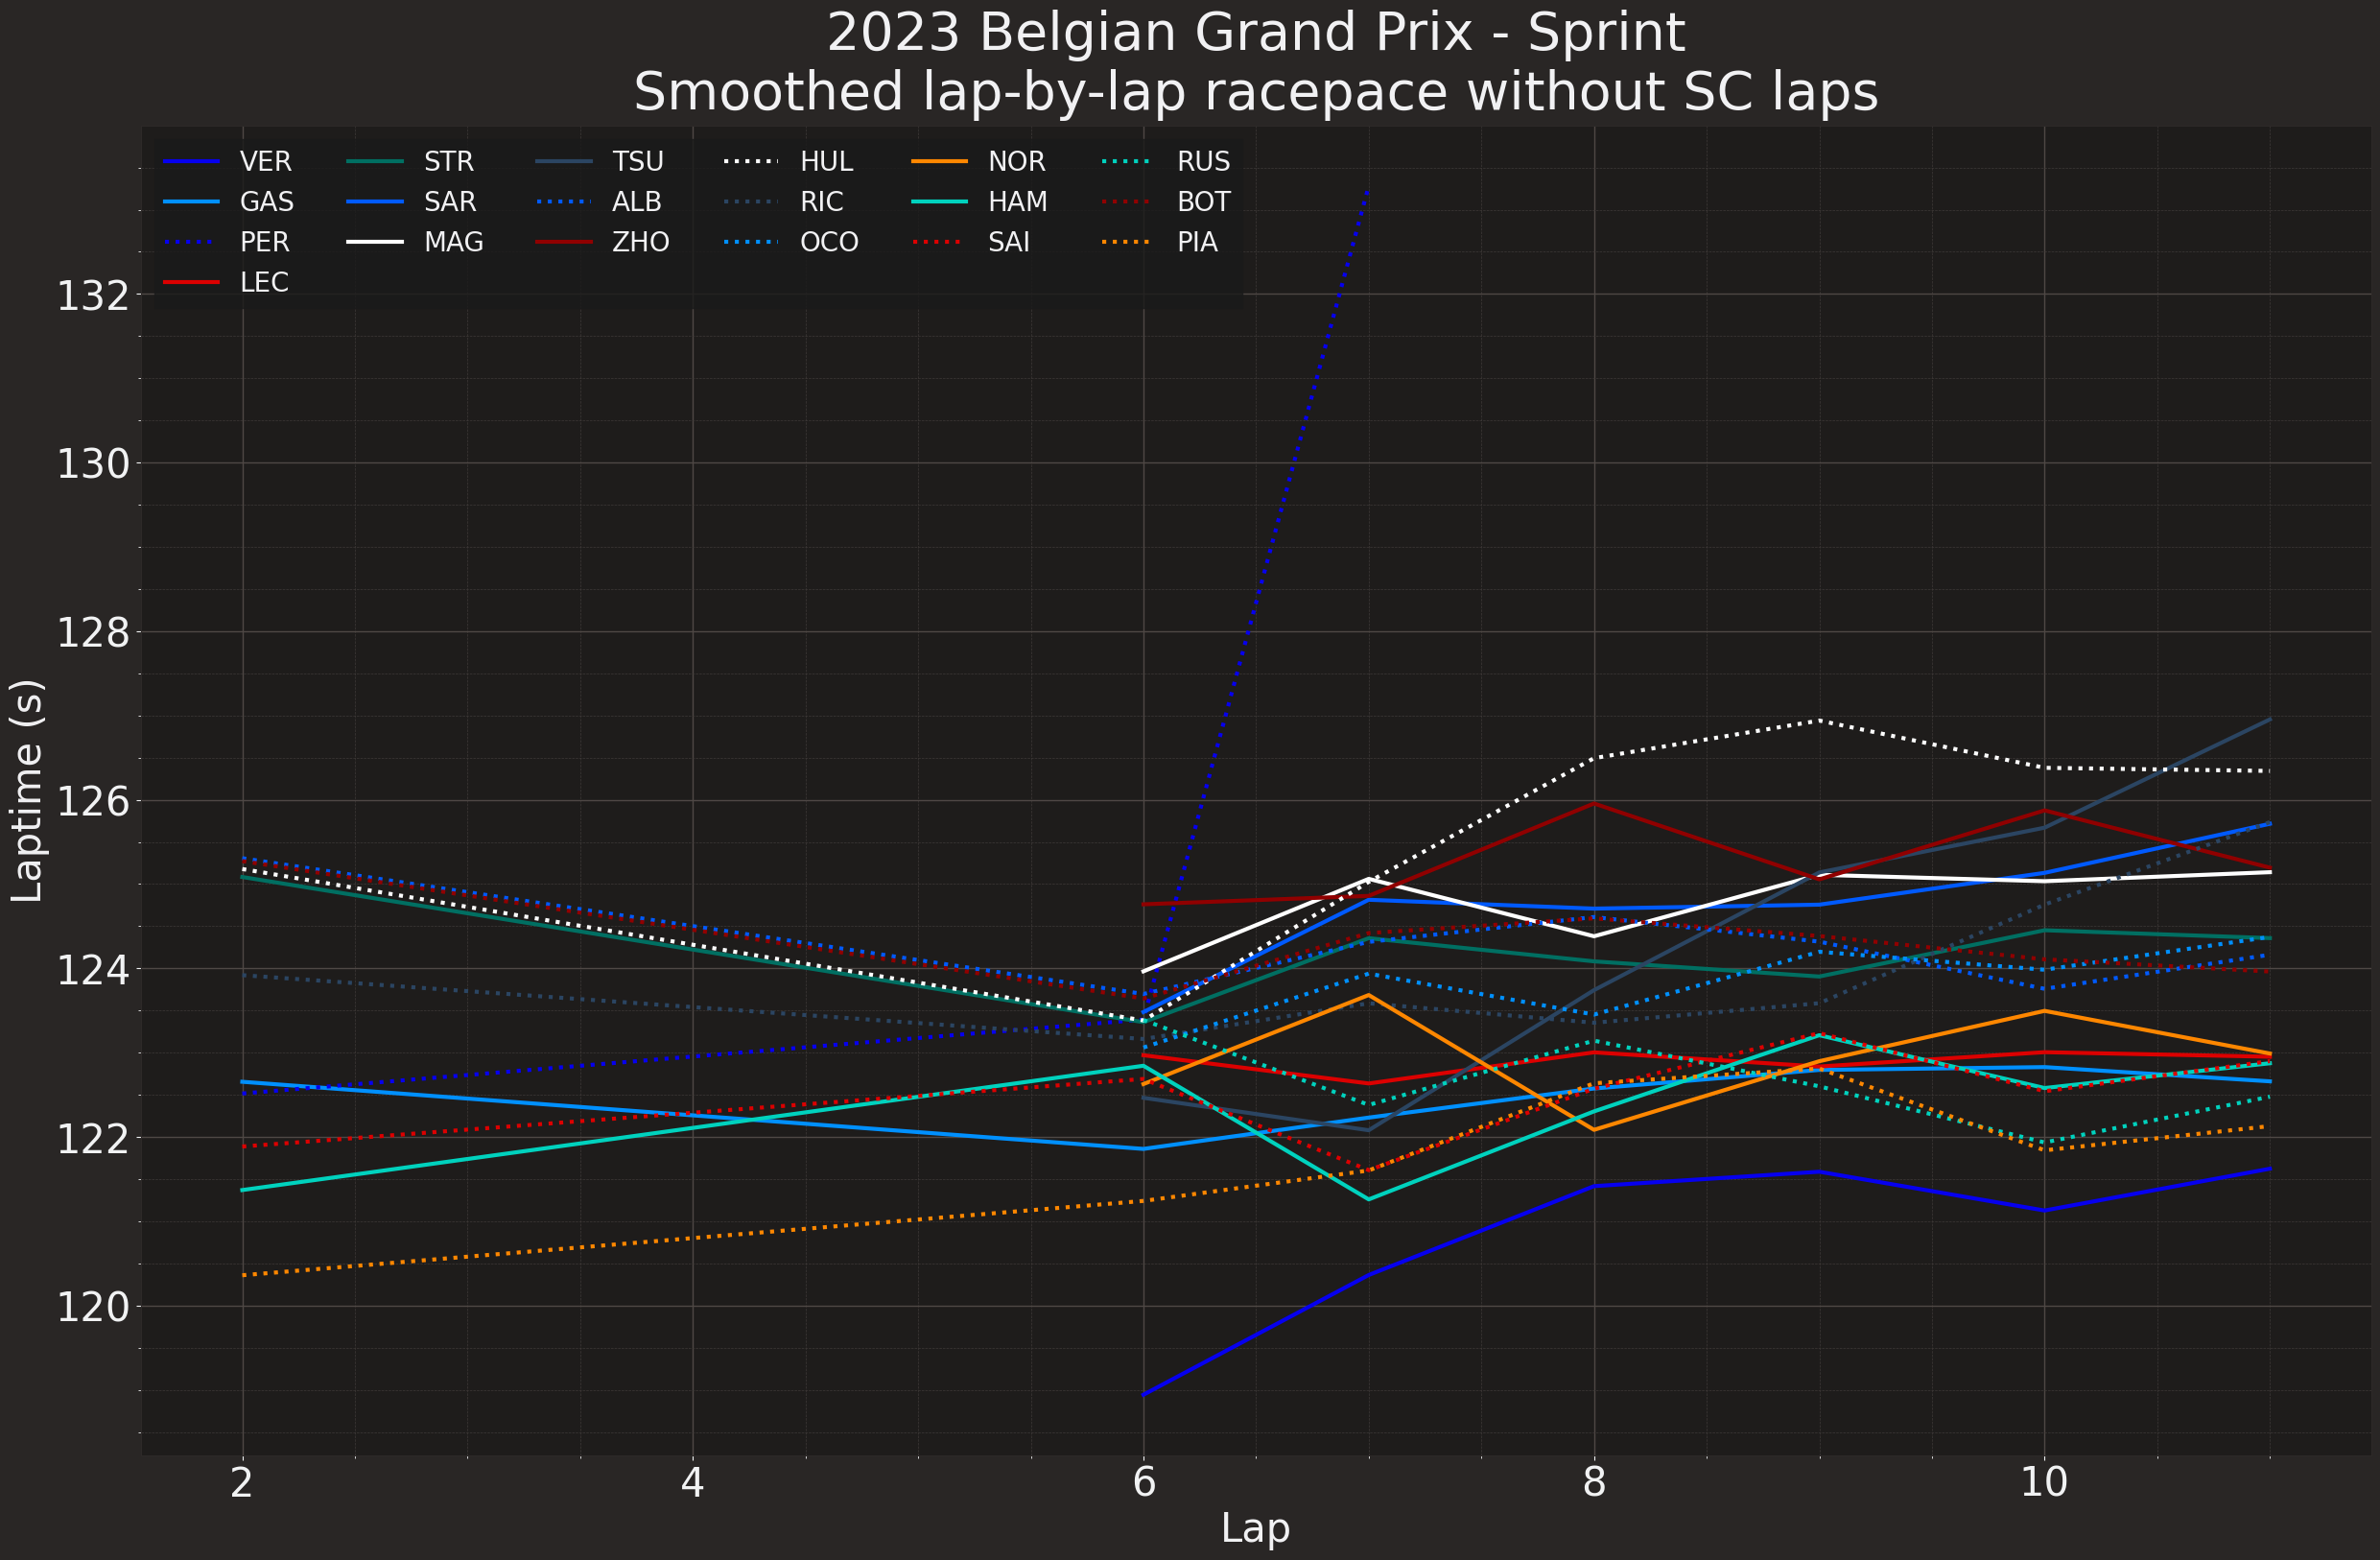

In [8]:
laps=fp.laps
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
laps = laps.loc[(laps['PitOutTime'].isnull() & laps['PitInTime'].isnull() & laps['IsAccurate']==True)]

# Also, we remove outliers since those don't represent the racepace,
# using the Inter-Quartile Range (IQR) proximity rule
q75, q25 = laps['LapTimeSeconds'].quantile(0.75), laps['LapTimeSeconds'].quantile(0.25)

intr_qr = q75 - q25

drivers_to_visualize = pd.unique(fp.laps['Driver'])

ff1.plotting.setup_mpl()
# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []
team_colors = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [30, 18]

# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots(1)


##############################
#
# Lap-by-lap racepace comparison
#
##############################
for driver in drivers_to_visualize:
    if not driver == "ALO":
        driver_laps = laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
        
        # Select all the laps from that driver
        driver_laps = driver_laps.dropna()
        
        # Extract the team for coloring purploses
        team = pd.unique(driver_laps['Team'])[0]
        
        # X-coordinate is the lap number
        x = driver_laps['LapNumber']
        
        # Y-coordinate a smoothed line between all the laptimes
        poly = np.polyfit(driver_laps['LapNumber'], driver_laps['LapTimeSeconds'], 5)
        y_poly = np.poly1d(poly)(driver_laps['LapNumber'])
        
        # Make sure that two teammates don't get the same line style
        linestyle = '-' if team not in visualized_teams else ':'
        
        # Plot the data
        ax.plot(x, y_poly, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, linewidth=3)
            
        # Set title
        ax.set_title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\nSmoothed lap-by-lap racepace without SC laps", fontsize=40)

        # Generate legend
        ax.legend(ncol=len(drivers_to_visualize)/3, prop={'size': 20})
        ax.tick_params(labelsize=30)
        # Add the team to the visualized teams variable so that the next time the linestyle will be different
        visualized_teams.append(team)
plt.ylabel("Laptime (s)", fontsize=30)
plt.xlabel("Lap", fontsize=30)

Text(0.5, 0, 'Lap')

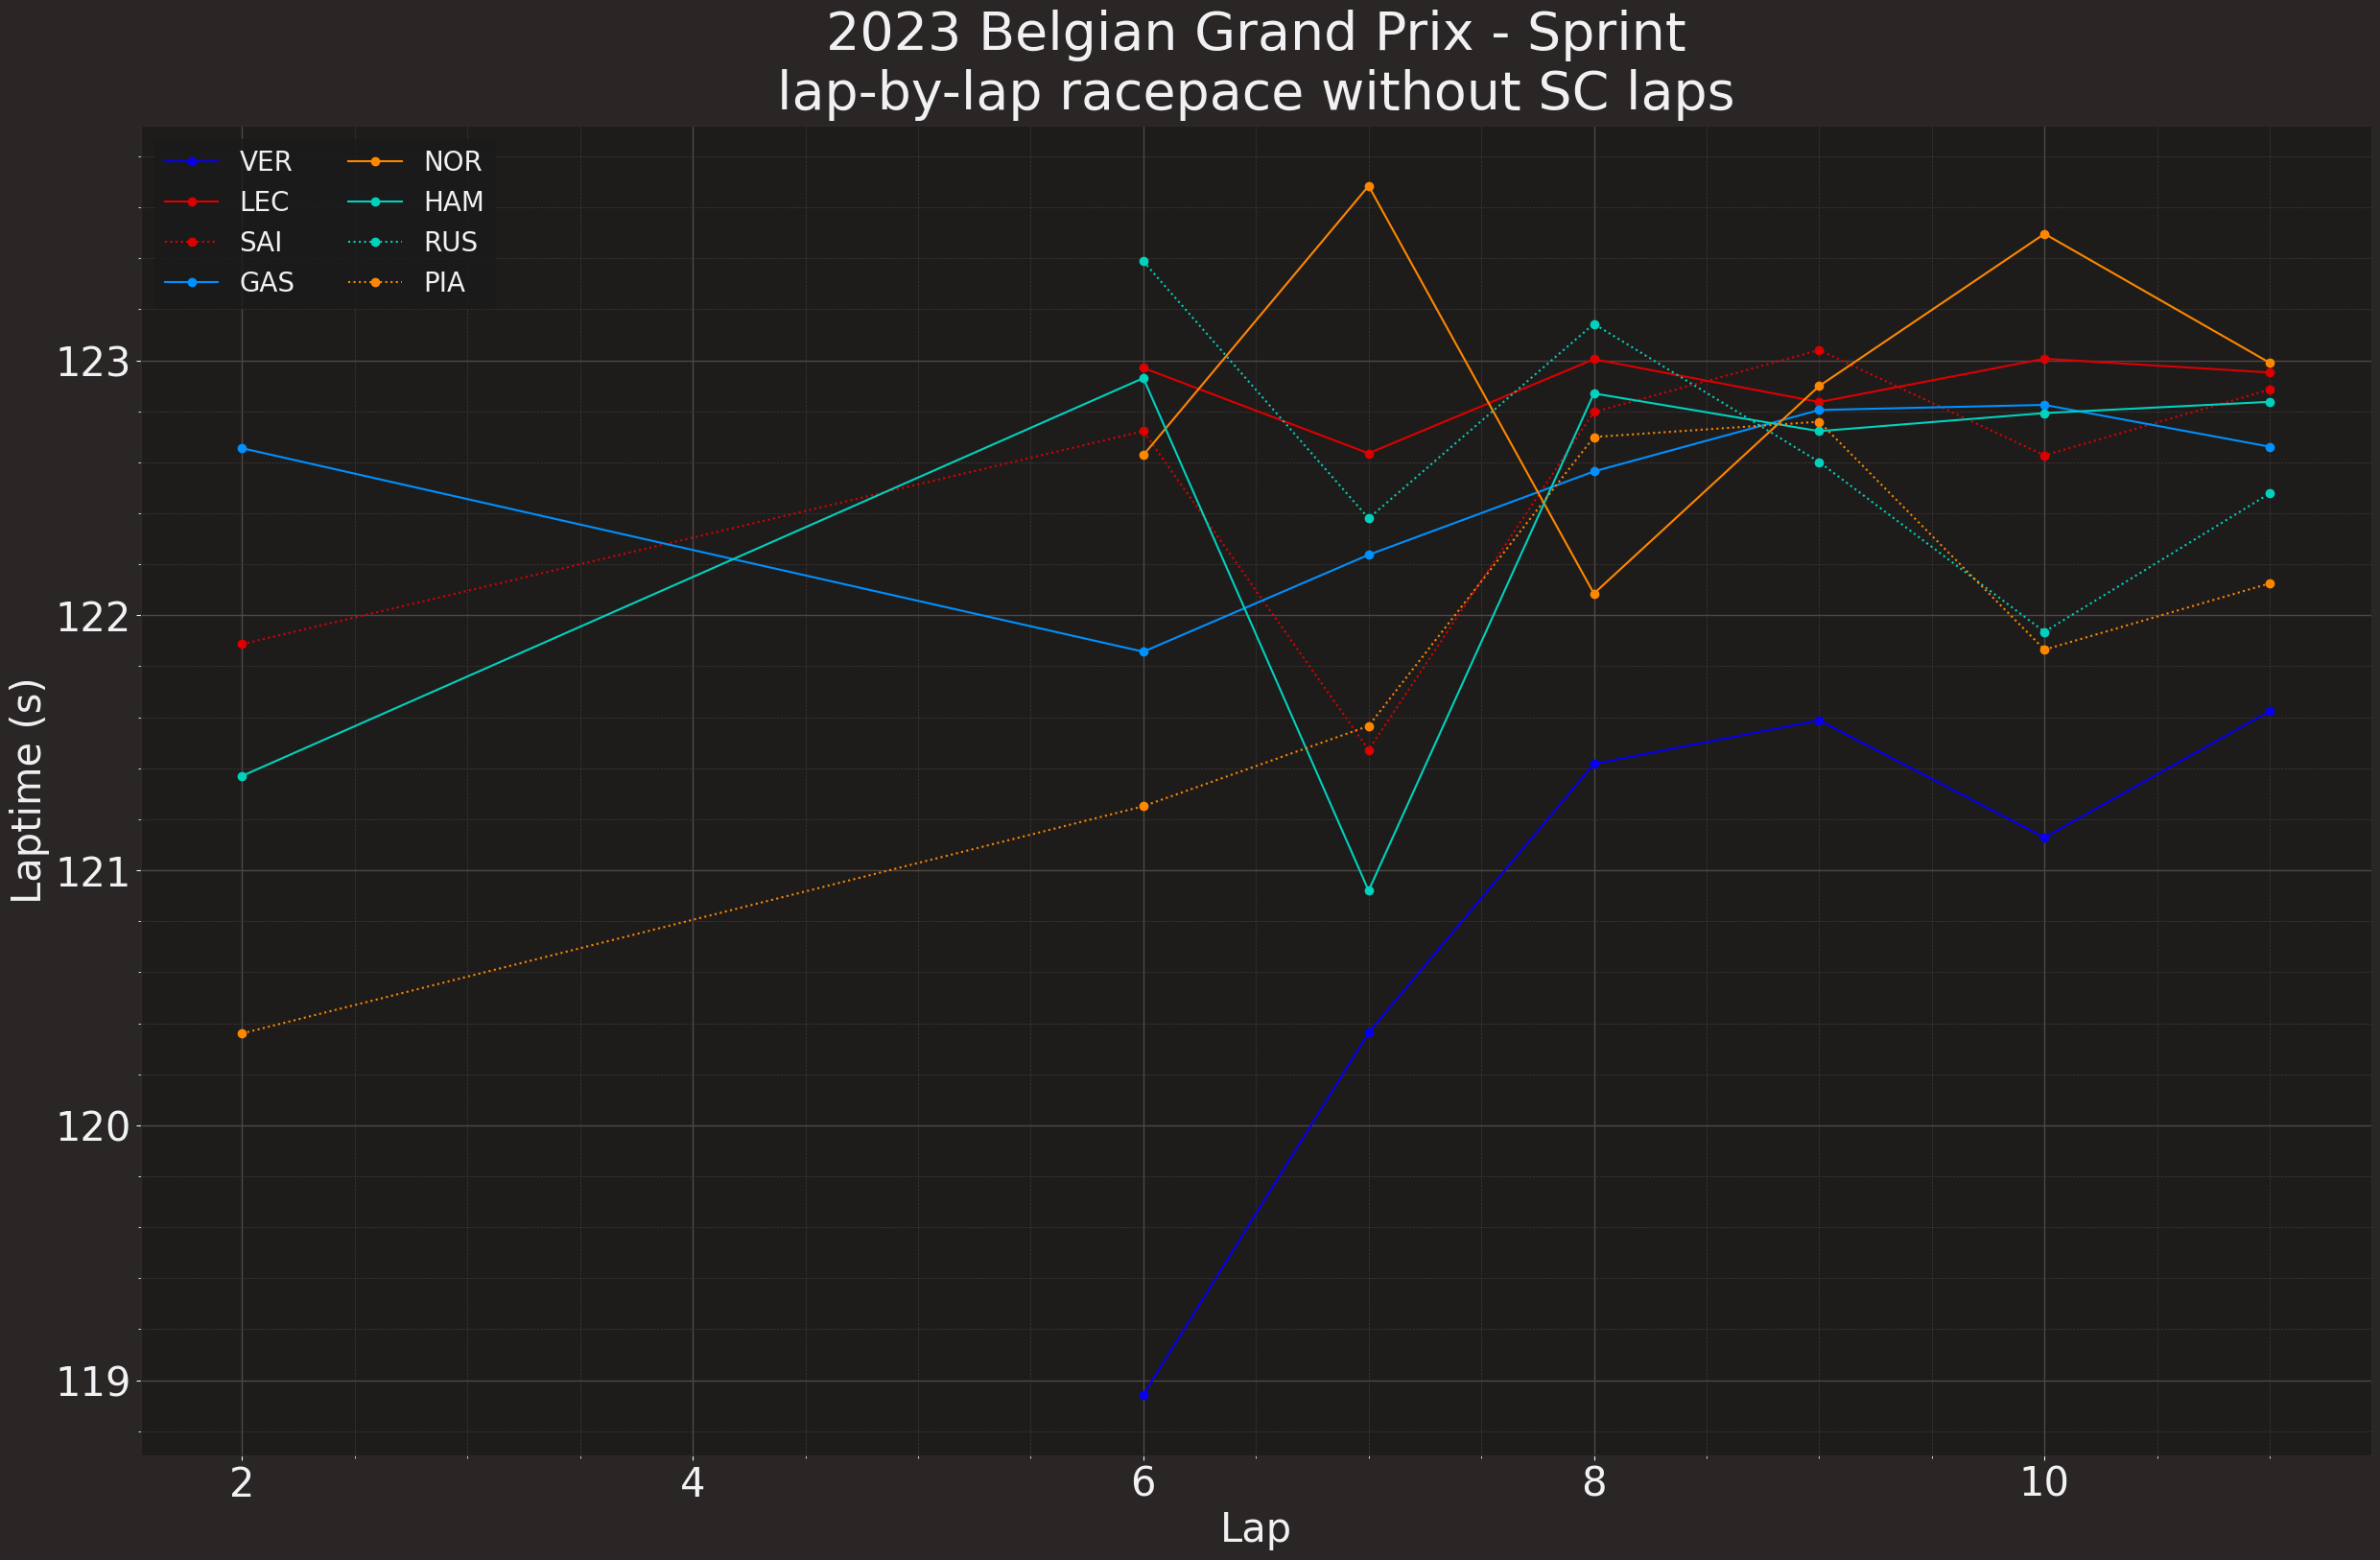

In [9]:
race_laps = fp.laps
drivers_to_visualize = ["VER", "LEC", "SAI", "GAS", "NOR", "HAM", "RUS", "PIA"]
race_laps['LapTimeSeconds'] = race_laps['LapTime'].dt.total_seconds()
race_laps = race_laps.loc[(race_laps['PitOutTime'].isnull() & race_laps['PitInTime'].isnull() & race_laps['IsAccurate']==True)]
# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [30, 18]
ff1.plotting.setup_mpl()
# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots()
# Lap-by-lap longrun comparison
for driver in drivers_to_visualize:
    driver_laps = race_laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team', 'TyreLife']]
    
    # Select all the laps from that driver
    driver_laps = driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = driver_laps['LapNumber']
    
    # Y-coordinate a smoothed line between all the laptimes
    y = seconds=driver_laps['LapTimeSeconds']
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, marker='o')
    
    # Append labels
    
    
    # Set title
    ax.set_title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\nlap-by-lap racepace without SC laps", fontsize=40)
    ax.legend(ncol=len(drivers_to_visualize)/3, prop={'size': 20})
    ax.tick_params(labelsize=30)
   
    visualized_teams.append(team)

plt.ylabel("Laptime (s)", fontsize=30)
plt.xlabel("Lap", fontsize=30)

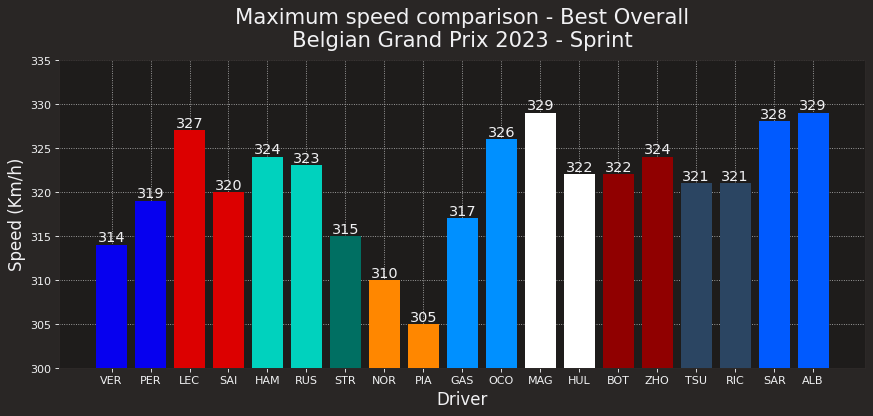

In [7]:
from collections import OrderedDict
fp_laps = fp.laps
#ricavo la lista di tutti i piloti
drivers = pd.unique(fp.laps['Driver'])
#elimino i tempi in cui i piloti erano in giro in o out
fp_laps = fp_laps.loc[(fp_laps['PitOutTime'].isnull() & fp_laps['PitInTime'].isnull())]

#dizionario dove inerirò tutte le massime velocità, le chiavi sono i nom dei piloti 
max_speed_dict = dict.fromkeys(drivers)

for driver in drivers:
        if not driver == 'ALO':
                max_speed_dict[driver] = max(fp_laps.pick_driver(driver).get_car_data()['Speed'])

team_color_drvrs = ['VER', 'PER', 'LEC', 'SAI', 'HAM', 'RUS', 'STR', 'NOR', 'PIA', 'GAS', 'OCO', 'MAG', 'HUL', 'BOT',  'ZHO', 'TSU', 'RIC', 'SAR', 'ALB']
team_colors = [ff1.plotting.team_color('RedBull'),ff1.plotting.team_color('RedBull'), 
               ff1.plotting.team_color('Ferrari'), ff1.plotting.team_color('Ferrari'),
               ff1.plotting.team_color('Mercedes'), ff1.plotting.team_color('Mercedes'),
               ff1.plotting.team_color('Aston Martin'),
               ff1.plotting.team_color('McLaren'), ff1.plotting.team_color('McLaren'),
               ff1.plotting.team_color('Alpine'), ff1.plotting.team_color('Alpine'),
               ff1.plotting.team_color('Haas'), ff1.plotting.team_color('Haas'),
               ff1.plotting.team_color('Alfa Romeo'), ff1.plotting.team_color('Alfa Romeo'), 
               ff1.plotting.team_color('Alpha Tauri'), ff1.plotting.team_color('Alpha Tauri'),
               ff1.plotting.team_color('Williams'), ff1.plotting.team_color('Williams'),]

max_speed_dict_ordered = OrderedDict((k, max_speed_dict[k]) for k in team_color_drvrs)
max_speed_dict_ordered = dict(max_speed_dict_ordered)

ff1.plotting.setup_mpl()
figure(figsize=(13, 5), dpi=80)
plt.bar_label(plt.bar(range(len(max_speed_dict_ordered)), list(max_speed_dict_ordered.values()), align='center', color=team_colors), fontsize = 13)
plt.xticks(range(len(max_speed_dict_ordered)), list(max_speed_dict_ordered.keys()))

ax = plt.gca()
ax.set_ylim([300, 335])
plt.title(f"Maximum speed comparison - Best Overall\n"
          f"{fp.event['EventName']} {fp.event.year} - {fp.name}")
plt.grid(visible=True, linestyle=':')
plt.xlabel('Driver', fontsize=15)
plt.ylabel('Speed (Km/h)', fontsize=15)
plt.show()